## A/B Testing for Marketing Campaigns
Marketing companies often face challenges in determining the effectiveness of their campaigns due to the complex nature of the market. Several different approaches can work, so to optimize marketing efforts, they often run A/B tests. An A/B test is a randomized experimentation process in which two or more versions of a variable (such as a webpage, banner, or advertisement) are shown to different segments of people at the same time. The goal is to determine which version has the maximum impact on key business metrics.

In this project, we will explore an A/B testing dataset that helps answer two key questions:

Would the campaign be successful?
If successful, how much of that success can be attributed to the ads?

### A/B Test Structure:
Experimental Group: The majority of participants are exposed to the advertisements (the experimental group).
Control Group: A small portion of participants sees a Public Service Announcement (PSA) or no advertisement at all in the same format and location as the ad.
By analyzing this dataset, we aim to assess the effectiveness of the advertisements, determine if the difference in performance between the two groups is statistically significant, and estimate how much revenue could potentially be generated from the ads.

### Data Dictionary:
1. Index: Row index
2. user id: Unique identifier for each user
test group:
3. "ad": The user saw the advertisement
4. "psa": The user saw the Public Service Announcement
5. converted: Indicates whether the user made a purchase (True = Purchased, False = Not Purchased)
6. total ads: The total number of ads the user saw
7. most ads day: The day on which the user saw the largest number of ads
8. most ads hour: The hour of the day when the user saw the most ads

In this notebook, we will analyze the data, perform statistical tests to evaluate the significance of the results, and make data-driven recommendations for the marketing campaign strategy.

### Dataset Link:
You can download the dataset from Kaggle using the following link:https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing




In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load Data
df =pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
# checking for duplicates in user id 
df.duplicated(subset = 'user id').sum()

0

In [8]:
# Remobving unwanted column
df.drop(['Unnamed: 0','user id'], axis= 1, inplace = True) 

In [9]:
# check columns
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [11]:
# checking if categorical columns has appriopriate number of levels
df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [13]:
# checking the levels of the categorical columns
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

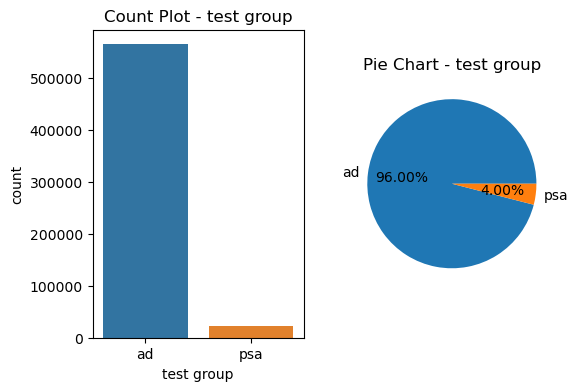

In [16]:
# Visualizing each varaible
variable = 'test group'

# Count Plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct ='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

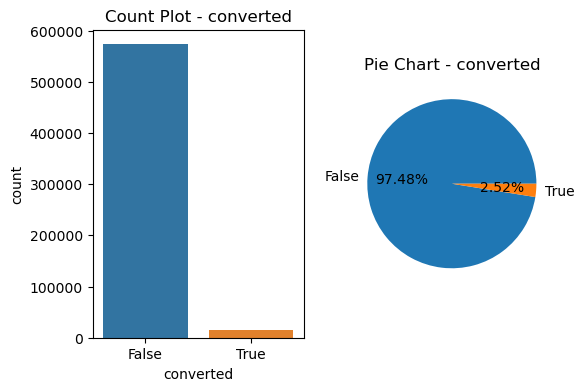

In [17]:
# Visualizing each variable 
variable = 'converted'

# Count Plot
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct ='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

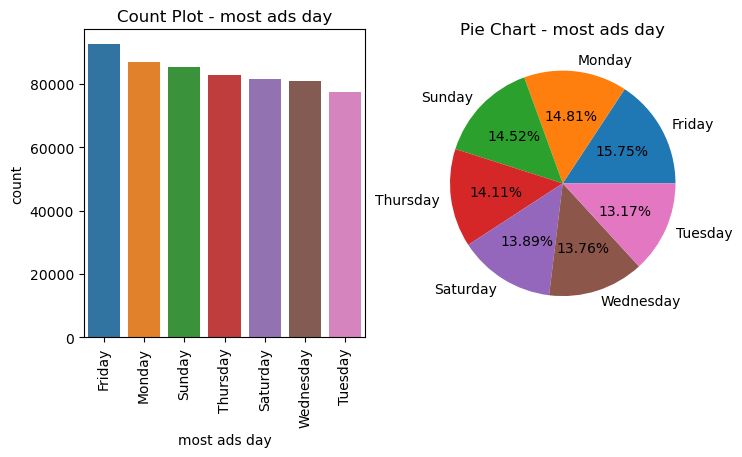

In [27]:
# Visualizing each variable 
variable = 'most ads day'

# Count Plot
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct ='%0.2f%%')
plt.title(f'Pie Chart - {variable}')


plt.show()

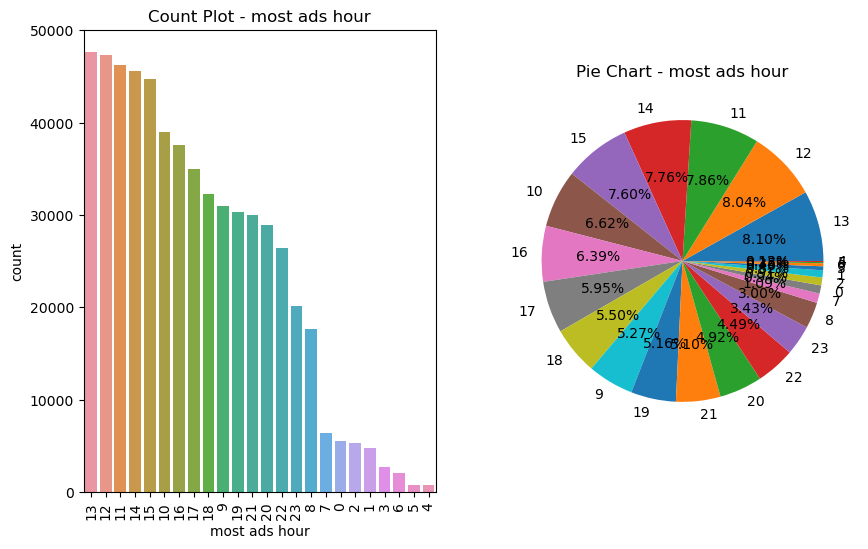

In [28]:
# Visualizing each variable 
variable = 'most ads hour'

# Count Plot
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct ='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

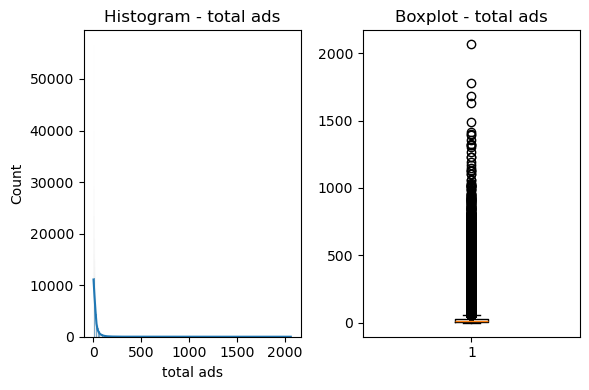

In [35]:
variable = 'total ads'

# Create a figure with specified size
plt.figure(figsize=(6, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[variable], kde=True)  # Added kde=True to show a density plot
plt.title(f'Histogram - {variable}')

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(df[variable])  # Added vert=False to make it horizontal
plt.title(f'Boxplot - {variable}')

# Show the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

The histogram is not clearly visible and the boxplt looks skewed

In [36]:
# Exploring the descriptive stat 
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

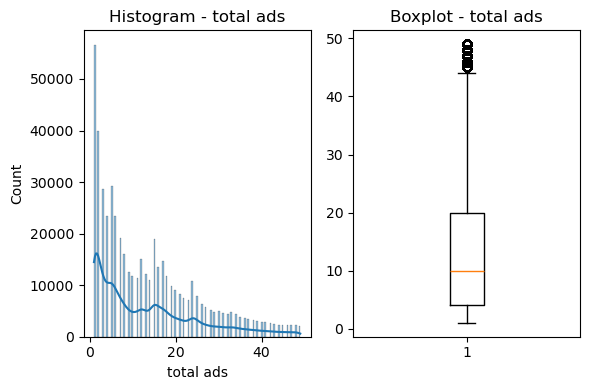

In [39]:
# Specify the variable to visualize
variable = 'total ads'

# Filter data for values close to the 75th percentile
filtered_data = df[df[variable] < 50]

# Create a figure with specified size
plt.figure(figsize=(6, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(filtered_data[variable], kde=True)   
plt.title(f'Histogram - {variable}')

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(filtered_data[variable])  
plt.title(f'Boxplot - {variable}')

# Show the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Bivariate Analysis

In [40]:
# To pair every variable with the converted variable
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [41]:
converted_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
converted_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


The crosstab shows the percentage of people who saw the ads and coverted and those who did not convert

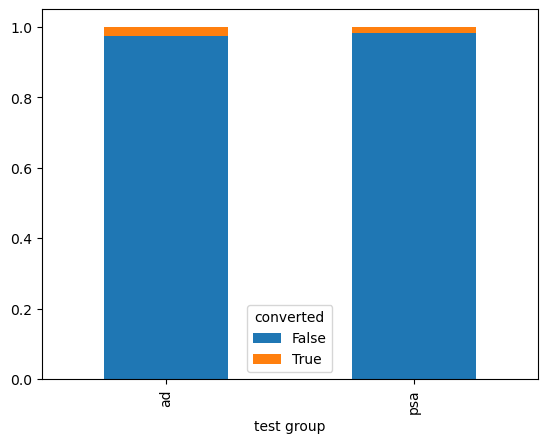

In [43]:
# ploting the convert_test_group in bar chart
converted_test_group.plot.bar(stacked = True);

The band of people who saw the ad and converted is relatively bigger than those who didn't see the add

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

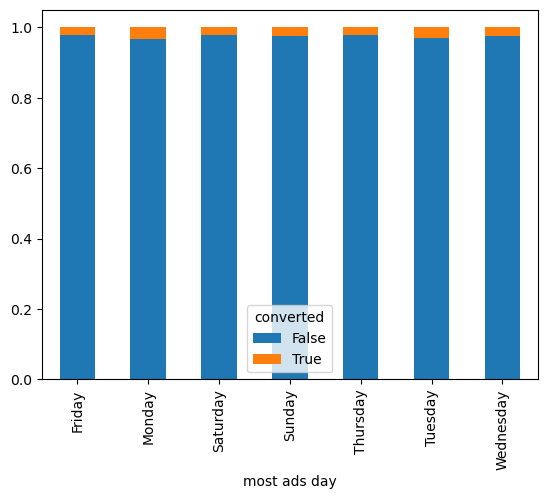

In [45]:
# For most ads day
converted_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(converted_day.sort_values(by = True, ascending = False))
converted_day.plot.bar(stacked = True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

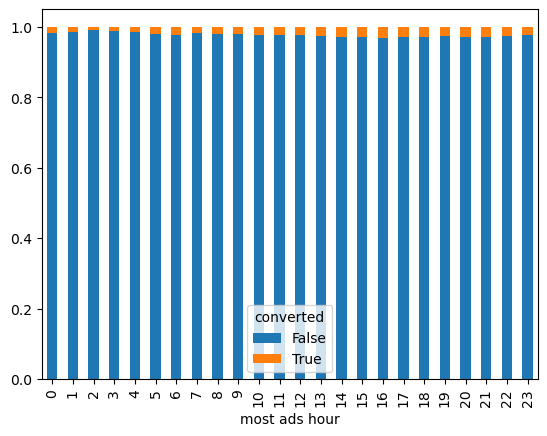

In [46]:
# For most ads hour
converted_day = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(converted_day.sort_values(by = True, ascending = False))
converted_day.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

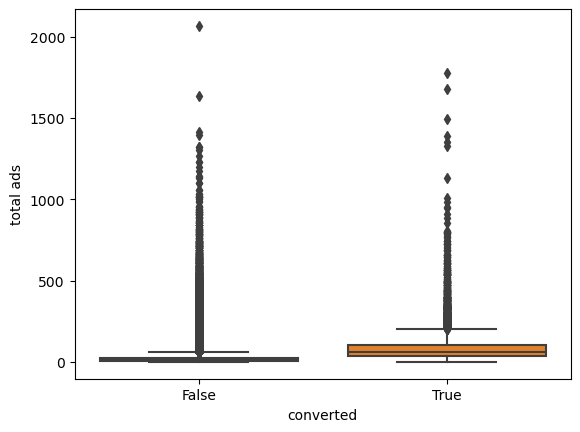

In [47]:
# for the numerical variable total ads we will use a boxplot
sns.boxplot(x ='converted', y = 'total ads', data = df)

Insights are not clear so we will filter for those close to the 75th percentile

<Axes: xlabel='converted', ylabel='total ads'>

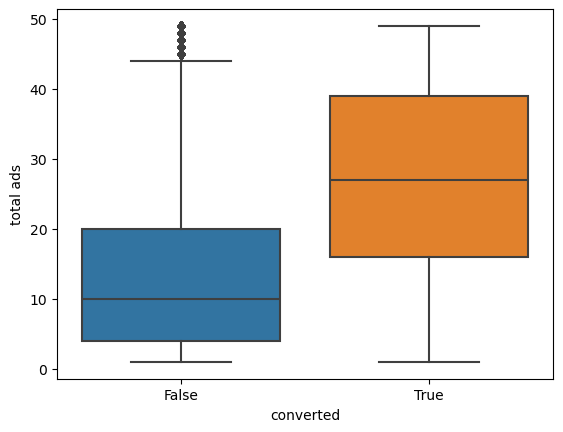

In [48]:
sns.boxplot(x ='converted', y = 'total ads', data = df[df['total ads'] < 50])

There is a noticeable difference in the number of ads viewed, with converted individuals seeing a median of approximately 25 ads, compared to a median of around 10 ads for those who did not convert.

## Statistical Tests


To perform a statistical test and properly frame the hypotheses based on the information you provided, we can rephrase the null hypothesis (Ho) and the alternative hypothesis (Ha) as follows:

Hypotheses:
Null Hypothesis (Ho): There is no significant difference in the conversion rates between people who saw the ad and those who saw the public service announcement (PSA).

Alternative Hypothesis (Ha): There is a significant difference in the conversion rates between people who saw the ad and those who saw the public service announcement (PSA).

In [61]:
from scipy.stats import chi2_contingency
alpha = 0.05 # Significance level (5%)
for variable in df_cat.columns:
    if variable != 'converted':
        
        # Cross tabulate
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        # Perform the Chi-Square Test of Independence
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Display result
        print(f"\nChi-Squared test for {variable} vs. converted:")
        print(f"Chi-Squared value: {chi2}")
        print(f"p-value: {p}")
        
           # Interpretation of the p-value 
        if p < alpha:
            print(f"Reject the null hypothesis: The difference in conversion rates accross {variable} is statitsically significant.")
        else:
            print(f"Fail to reject the null hypothesis: There is no significant difference in conversion rates across {variable}.")


Chi-Squared test for test group vs. converted:
Chi-Squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
Reject the null hypothesis: The difference in conversion rates accross test group is statitsically significant.

Chi-Squared test for most ads day vs. converted:
Chi-Squared value: 410.0478857936585
p-value: 1.932184379244731e-85
Reject the null hypothesis: The difference in conversion rates accross most ads day is statitsically significant.

Chi-Squared test for most ads hour vs. converted:
Chi-Squared value: 430.76869230822086
p-value: 8.027629823696771e-77
Reject the null hypothesis: The difference in conversion rates accross most ads hour is statitsically significant.


In [62]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [69]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# To check for assumptions
# 1. Normality Assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True Group): p_value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False Group): p_value = {shapiro_p_value_false}")

# 2. Equality of Variance Assumption
levene_stat, levene_p_value = levene(df[df['converted'] == True]['total ads'], 
                                     df[df['converted'] == False]['total ads'])

print(f"Levene's test for equality of variance: p_value = {levene_p_value}")


Shapiro-Wilk test for normality (True Group): p_value = 0.0
Shapiro-Wilk test for normality (False Group): p_value = 0.0
Levene's test for equality of variance: p_value = 0.0


- The Shapiro-Wilk test shows that the data for both groups is not normally distributed (p-value < 0.05).
- Levene's test indicates unequal variances between the two groups (p-value < 0.05).
- A non-parametric test is recommended for further analysis.

Given the non-normal distribution of the data and unequal variances, we would opt for a non-parametric statistical test (e.g., Mann-Whitney U test) instead of parametric tests like the t-test.









In [73]:
# Step 2: Performing the Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_vlaue_false > alpha and levene_p_value > alpha:
    t_test, t_p_value =ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Indpendent two-sample t-test: p-value = {t_p_value}")

else: 
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


The Mann-Whitney U test result (p-value < 0.05) indicates a statistically significant difference in the distribution of 'total ads' between the converted and non-converted groups.


### **General Deduction**:
The results from the statistical tests indicate the following:

1. **Test Group vs. Conversion**: There is a statistically significant difference in conversion rates between people exposed to ads and those shown public service announcements (PSAs). This suggests that the type of content significantly impacts the likelihood of conversion.

2. **Most Ads Day vs. Conversion**: The day on which users saw the most ads has a statistically significant relationship with conversion rates. This implies that certain days might be more effective for ad exposure and conversions.

3. **Most Ads Hour vs. Conversion**: The hour of the day when users saw the most ads also shows a statistically significant relationship with conversion rates. Timing appears to play a crucial role in user engagement and conversion.

4. **Total Ads vs. Conversion (Mann-Whitney U Test)**: There is a statistically significant difference in the distribution of the total number of ads seen by converted and non-converted groups. Converted users tend to have higher exposure to ads compared to non-converted users.

These findings suggest that the campaign's success is influenced by ad exposure, timing, and user behavior patterns, making these factors critical to consider in optimizing future marketing strategies.
